# Historical Tonnage List API Examples

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
signal_ocean_api_key = '' #replace with your subscription key

## Retrieving a historical tonnage list
First, we need to determine the parameters of the **historical tonnage list** (**HTL**). In order to fetch an HTL, we will need to specify:
- a loading port,
- a vessel class,
- a time frame.

Ports and vessel classes can be retrieved through their corresponding APIs via the `PortAPI` and `VesselClassAPI` classes:

In [2]:
from signal_ocean import PortAPI, VesselClassAPI, Connection

connection = Connection(signal_ocean_api_key)

port_api = PortAPI(connection)
vessel_class_api = VesselClassAPI(connection)

vessel_class_api.get_vessel_classes()

(VesselClass(id=60, name='VLGCLpg'),
 VesselClass(id=61, name='MidsizeLpg'),
 VesselClass(id=62, name='HandyLpg'),
 VesselClass(id=63, name='SmallLpg'),
 VesselClass(id=69, name='VLOC'),
 VesselClass(id=70, name='Capesize'),
 VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=77, name='Handysize'),
 VesselClass(id=78, name='ULCV'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=83, name='FeederContainer'),
 VesselClass(id=84, name='VLCC'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'),
 VesselClass(id=88, name='MR2'),
 VesselClass(id=89, name='MR1'),
 VesselClass(id=90, name='Small'),
 VesselClass(id=91, name='LNGLng'),
 VesselClass(id=

Ports can be looked up by their name using the `PortFilter`:

In [3]:
from signal_ocean import PortFilter

port_api.get_ports(PortFilter(name_like='rot'))

(Port(id=3689, name='Rotterdam'),
 Port(id=6625, name='Rota'),
 Port(id=8920, name='Crotone'),
 Port(id=15617, name='Rarotonga'))

And so can vessel classes with the use of the `VesselClassFilter`:

In [4]:
from signal_ocean import VesselClassFilter

vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='MAX'))

(VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'))

Note that the search is case-insensitive and does not require specifying exact names.

We will look for Aframax vessels in Ceyhan, 6 days forward, for the last 90 days:

In [5]:
from datetime import date, timedelta,time

vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='ceyhan'))[0]
days_forward = 6
today = date.today()
start_date = today - timedelta(days=5)

With the parameters above, we can now call the API:

In [6]:
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI

htl_api = HistoricalTonnageListAPI(connection)

htl = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    start_date,
    end_date=today
)

The resulting historical tonnage list is a Python object that contains a collection of tonnage lists, each of which has a timestamp and a collection of vessel data. The tonnage lists are ordered by date in descending order:

In [7]:
todays_tl = htl[0]
print('Date:', todays_tl.date)
print('Vessel count:', len(todays_tl.vessels))
print('Example vessel:', todays_tl.vessels[0])

Date: 2020-08-12 00:00:00+00:00
Vessel count: 45
Example vessel: Vessel(imo=9215050, name='Alboran I', vessel_class='Aframax', ice_class=None, year_built=2001, deadweight=109326, length_overall=244.6, breadth_extreme=42, market_deployment='Spot', push_type='Not Pushed', open_port='Hong Kong', open_date=datetime.datetime(2019, 6, 20, 0, 0, tzinfo=datetime.timezone.utc), operational_status='Laden', commercial_operator='Monte Nero Maritime', commercial_status='Available', eta=datetime.datetime(2019, 7, 15, 0, 0, tzinfo=datetime.timezone.utc), latest_ais=datetime.datetime(2019, 6, 13, 0, 0, tzinfo=datetime.timezone.utc), subclass='Dirty', willing_to_switch_subclass=False, open_prediction_accuracy='Port', open_areas=(Area(name='South China', location_taxonomy='Narrow Area'), Area(name='China / Taiwan', location_taxonomy='Wide Area'), Area(name='China', location_taxonomy='Country')), availability_port_type='Source', availability_date_type='Prediction')


The result can also be converted into a Pandas data frame:

In [8]:
data_frame = htl.to_data_frame()
data_frame

name vessel_class ice_class  \
date                      imo                                                 
2020-08-12 00:00:00+00:00 9215050          Alboran I      Aframax       NaN   
                          9187643             Arnica      Aframax       NaN   
                          9038830             Proteo      Aframax       NaN   
                          9038878                Eos      Aframax       NaN   
                          9165762        Al Marzoqah      Aframax       NaN   
...                                              ...          ...       ...   
2020-08-07 00:00:00+00:00 9683075  British Restraint      Aframax       NaN   
                          9787182    Minerva Zenobia      Aframax       NaN   
                          9276597       Minerva Lisa      Aframax        1C   
                          9412036       Signal Alpha      Aframax       NaN   
                          9417452      Chrysanthemum      Aframax       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2020-08-12 00:00:00+00:00 9215050        2001      109326          244.60   
                          9187643        2000       99144          248.00   
                          9038830        1993       99392          243.97   
                          9038878        1993       99440          243.97   
                          9165762        1999      105084          243.56   
...                                       ...         ...             ...   
2020-08-07 00:00:00+00:00 9683075        2017      109258          250.00   
                          9787182        2018      114658          250.00   
                          9276597        2004      103755          243.57   
                          9412036        2011      116337          249.90   
                          9417452        2009      105187          243.97   

                                   breadth_extreme subclass  \
date                      imo                                 
2020-08-12 00:00:00+00:00 9215050               42    Dirty   
                          9187643               43    Dirty   
                          9038830               46    Dirty   
                          9038878               46    Dirty   
                          9165762               42    Dirty   
...                                            ...      ...   
2020-08-07 00:00:00+00:00 9683075               44    Clean   
                          9787182               44    Dirty   
                          9276597               42    Dirty   
                          9412036               44    Dirty   
                          9417452               42    Dirty   

                                  market_deployment_point_in_time  \
date                      imo                                       
2020-08-12 00:00:00+00:00 9215050                            Spot   
                          9187643                        Contract   
                          9038830                         Program   
                          9038878                           Relet   
                          9165762                        Contract   
...                                                           ...   
2020-08-07 00:00:00+00:00 9683075                         Program   
                          9787182                            Spot   
                          9276597                            Spot   
                          9412036                            Spot   
                          9417452                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2020-08-12 00:00:00+00:00 9215050              Not Pushed  ...   
                          9187643              Not Pushed  ...   
                          9038830   

## Example 1 - Plotting a supply trend
The data frame format makes it very easy to generate a supply trend plot.

We'll generate a supply trend from the beginning of the year, but we'll also filter the vessel list by looking for vessels that:
- are pushed,
- have a market deployment type of "Relet" or "Spot",
- their commercial status is available, cancelled or failed,
- are crude oil tankers (their vessel subclass is "Dirty"),
- their AIS information is no older than 5 days.

Filtering can be achieved by creating an instance of a `VesselFilter` and passing it to the `get_historical_tonnage_list` method. A `VesselFilter` meeting the above criteria will look as follows:

In [9]:
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass

vessel_filter = VesselFilter(
    push_types=[PushType.PUSHED],
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    commercial_statuses=[CommercialStatus.AVAILABLE, CommercialStatus.CANCELLED, CommercialStatus.FAILED],
    vessel_subclass=VesselSubclass.DIRTY,
    latest_ais_since=5
)

Note the usage of the `PushType`, `MarketDeployment`, `CommercialStatus`, and `VesselSubclass`. These are enum-like classes that contain constants for all the possible values for a given `VesselFilter` parameter. To list the available values for any of the classes, just invoke `list()` on the class:

In [10]:
list(CommercialStatus)

['On Subs', 'Failed', 'Cancelled', 'Available']

You can use these values directly or use a corresponding class member:

In [11]:
CommercialStatus.ON_SUBS == 'On Subs'

True

Let's get the HTL for our filter:

In [12]:
beginning_of_year = date(today.year, 1, 1)

htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    start_date,
    end_date=today,
    vessel_filter=vessel_filter,
    time=time(hour=6)
)

supply_trend_data_frame = htl_for_supply_trend.to_data_frame()

supply_trend_data_frame

name vessel_class ice_class  \
date                      imo                                               
2020-08-12 06:00:00+00:00 9516959           Belmar      Aframax        1C   
                          9656890     Fos Hamilton      Aframax       NaN   
                          9387255    Eagle Sapporo      Aframax       NaN   
                          9309435    Minerva Alice      Aframax        1A   
                          9737383          Oslo Ts      Aframax        1B   
...                                            ...          ...       ...   
2020-08-07 06:00:00+00:00 9247390        Neverland      Aframax       NaN   
                          9309435    Minerva Alice      Aframax        1A   
                          9787182  Minerva Zenobia      Aframax       NaN   
                          9276597     Minerva Lisa      Aframax        1C   
                          9417452    Chrysanthemum      Aframax       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2020-08-12 06:00:00+00:00 9516959        2011      115903          248.97   
                          9656890        2013      105408          244.15   
                          9387255        2008      110448          245.50   
                          9309435        2006      114850          254.00   
                          9737383        2017      112700          250.00   
...                                       ...         ...             ...   
2020-08-07 06:00:00+00:00 9247390        2003      105411          239.00   
                          9309435        2006      114850          254.00   
                          9787182        2018      114658          250.00   
                          9276597        2004      103755          243.57   
                          9417452        2009      105187          243.97   

                                   breadth_extreme subclass  \
date                      imo                                 
2020-08-12 06:00:00+00:00 9516959               45    Dirty   
                          9656890               42    Dirty   
                          9387255               42    Dirty   
                          9309435               44    Dirty   
                          9737383               44    Dirty   
...                                            ...      ...   
2020-08-07 06:00:00+00:00 9247390               42    Dirty   
                          9309435               44    Dirty   
                          9787182               44    Dirty   
                          9276597               42    Dirty   
                          9417452               42    Dirty   

                                  market_deployment_point_in_time  \
date                      imo                                       
2020-08-12 06:00:00+00:00 9516959                            Spot   
                          9656890                            Spot   
                          9387255                           Relet   
                          9309435                           Relet   
                          9737383                           Relet   
...                                                           ...   
2020-08-07 06:00:00+00:00 9247390                           Relet   
                          9309435                           Relet   
                          9787182                            Spot   
                          9276597                            Spot   
                          9417452                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2020-08-12 06:00:00+00:00 9516959                  Pushed  ...   
                          9656890                  Pushed  ...   
                          9387255                  Pushed  .

Now, we can generate the plot:

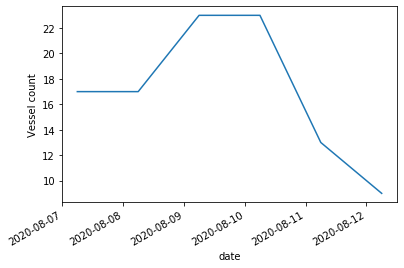

In [13]:
from signal_ocean.historical_tonnage_list import IndexLevel

supply_trend = supply_trend_data_frame.groupby(IndexLevel.DATE, sort=True).size()
plot = supply_trend.plot()
plot.set_ylabel('Vessel count')

plot

## Example 2 - Generating an Excel sheet
The data frame can be easily saved as an Excel file by using Pandas's built-in `to_excel()` function.

Before we do that, we need to remove all the time zone information from all the timestamps in the data frame. This is because Excel does not support storing time zone information along with timestamps. However, Signal Ocean's SDK always provides time zone information to make all timestamp-based computation unambiguous.

In [14]:
from signal_ocean.historical_tonnage_list import Column

without_time_zones = (
    supply_trend_data_frame
        .reset_index()
        .astype({ IndexLevel.DATE: 'datetime64[ns]', Column.OPEN_DATE: 'datetime64[ns]', Column.ETA: 'datetime64[ns]', Column.LATEST_AIS: 'datetime64[ns]'})
        .set_index([IndexLevel.DATE, IndexLevel.IMO])
 )

Now, we can generate the Excel file:

In [15]:
without_time_zones.to_excel('htl.xlsx')